In [12]:
from astropy.table import QTable
import numpy as np
from pathlib import Path
from ctlearn_manager import CTLearnModelManager, CTLearnTriModelManager, load_model_from_index

ImportError: cannot import name 'load_model_manager' from 'ctlearn_manager' (/home/blacave/miniforge3/envs/ctlearn-cluster/lib/python3.10/site-packages/ctlearn_manager/__init__.py)

# 🧠 Create new CTLearnModelManager
CTLearnModelManager is an object that allows you to setup and train a CTLearn model

In [9]:
# Where all the models are stored
MODEL_INDEX_FILE = "/home/blacave/CTLearn/Software/CTLearn-Manager/ctearn_models_index.ecsv"
# General parameters
model_parameters = {
    'model_nickname' : "direction_stereo_20deg",
    'model_dir' : "/home/blacave/CTLearn/Data/CTLearn_Models_SST1M/",
    'notes' : "Stereo model for 20deg zenith distance",
    'reco' : 'direction', #["energy", "direction", "type"]
    'channels' : ['cleaned_image', 'cleaned_relative_peak_time'], # Order matters
    'telescope_names' : ['SST1M_1', 'SST1M_2'],
    'telescopes_indices' : [1, 2],
    'training_gamma_dirs' : ['/home/blacave/CTLearn/Data/DL1/SST1M/MC/Gamma_diffuse/20deg/merged/training/'],
    'training_proton_dirs' : ['/home/blacave/CTLearn/Data/DL1/SST1M/MC/Proton/20deg/merged/training/'],
    'training_gamma_zenith_distances' : [20],
    'training_gamma_azimuths' : [0],
    'training_proton_zenith_distances' : [20],
    'training_proton_azimuths' : [0],
    'max_training_epochs' : 15, 
}
new_model = CTLearnModelManager(model_parameters, MODEL_INDEX_FILE)
new_model.save_to_index()

🧠 Model name: energy_TEL1_2_ZD20_Az0
❌ Model nickname energy_stereo_20deg already in table


In [10]:
new_model.launch_training(n_epochs=15)

🚀 Launching training for 15 epochs
🆕 Model does not exist: will create energy_stereo_20deg_v0
ctlearn-train-model             --signal /home/blacave/CTLearn/Data/DL1/SST1M/MC/Gamma_diffuse/20deg/merged/training/                         --reco energy             --output /home/blacave/CTLearn/Data/CTLearn_Models_SST1M//energy_stereo_20deg_v0/             --DLImageReader.channels=cleaned_image --DLImageReader.channels=cleaned_relative_peak_time             --TrainCTLearnModel.n_epochs=15             --verbose             --TrainCTLearnModel.save_best_validation_only=True            --overwrite             --DLImageReader.mode=stereo             --TrainCTLearnModel.stack_telescope_images=true            --DLImageReader.min_telescopes=2


2024-12-19 11:26:14.909574: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-19 11:26:14.909661: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-19 11:26:14.909698: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-19 11:26:14.922326: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-19 11:26:20,002 INFO [ctlearn.ctlearn-trai

Epoch 1/15


2024-12-19 11:27:22.102784: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-12-19 11:27:25.812695: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x565568550ca0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-19 11:27:25.812748: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 SUPER, Compute Capability 8.9
2024-12-19 11:27:25.820860: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-19 11:27:25.971841: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: val_loss improved from inf to 0.25080, saving model to /home/blacave/CTLearn/Data/CTLearn_Models_SST1M/energy_stereo_20deg_v0/ctlearn_model.cpk
361/361 - 225s - loss: 0.3654 - mae_energy: 0.3654 - val_loss: 0.2508 - val_mae_energy: 0.2508 - lr: 1.0000e-04 - 225s/epoch - 623ms/step
Epoch 2/15

Epoch 2: val_loss improved from 0.25080 to 0.23710, saving model to /home/blacave/CTLearn/Data/CTLearn_Models_SST1M/energy_stereo_20deg_v0/ctlearn_model.cpk
361/361 - 189s - loss: 0.2286 - mae_energy: 0.2286 - val_loss: 0.2371 - val_mae_energy: 0.2371 - lr: 1.0000e-04 - 189s/epoch - 525ms/step
Epoch 3/15

Epoch 3: val_loss improved from 0.23710 to 0.18560, saving model to /home/blacave/CTLearn/Data/CTLearn_Models_SST1M/energy_stereo_20deg_v0/ctlearn_model.cpk
361/361 - 188s - loss: 0.1961 - mae_energy: 0.1961 - val_loss: 0.1856 - val_mae_energy: 0.1856 - lr: 1.0000e-04 - 188s/epoch - 522ms/step
Epoch 4/15

Epoch 4: val_loss did not improve from 0.18560
361/361 - 176s - loss: 0.1780 - mae

2024-12-19 12:13:35,086 INFO [ctlearn.ctlearn-train-model] (train_model.start): Training and evaluating finished succesfully!
2024-12-19 12:13:35,087 INFO [ctlearn.ctlearn-train-model] (train_model.finish): Plotting training history...
2024-12-19 12:13:35,092 INFO [ctlearn.ctlearn-train-model] (train_model.finish): Plotting training history: loss
2024-12-19 12:13:35,438 INFO [ctlearn.ctlearn-train-model] (train_model.finish): Plotting training history: mae_energy
2024-12-19 12:13:35,555 INFO [ctlearn.ctlearn-train-model] (train_model.finish): Tool is shutting down
2024-12-19 12:13:35,555 INFO [ctlearn.ctlearn-train-model] (tool.run): Finished: ctlearn-train-model
2024-12-19 12:13:35,565 INFO [ctlearn.ctlearn-train-model] (tool.write_provenance): Output: 
2024-12-19 12:13:35,565 DEBUG [ctlearn.ctlearn-train-model] (tool.write_provenance): PROVENANCE: 'Details about provenance is found in /home/blacave/CTLearn/Software/CTLearn-Manager/notebooks/ctlearn-train-model.provenance.log'
2024-12

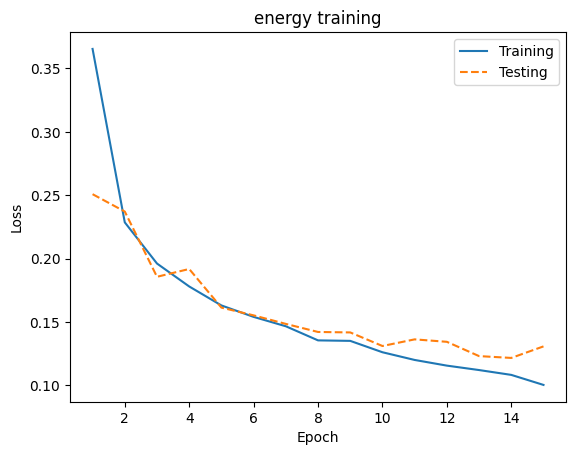

In [11]:
new_model.plot_loss()